In [4]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [6]:
df = pd.read_csv("C:/AI/abalone.data", header = None)
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Text(0.5, 1.0, 'Rings of abalone')

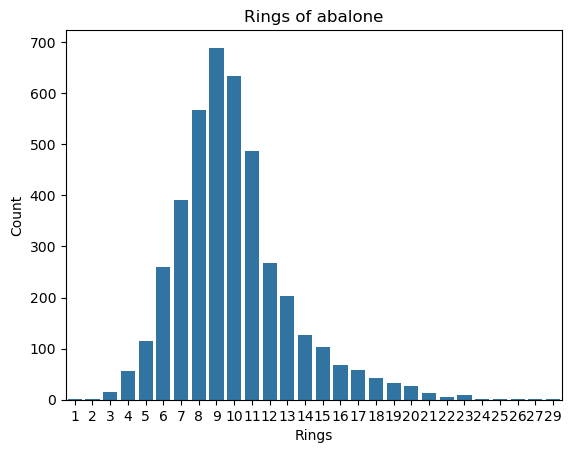

In [8]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings of abalone")

In [10]:
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20836\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


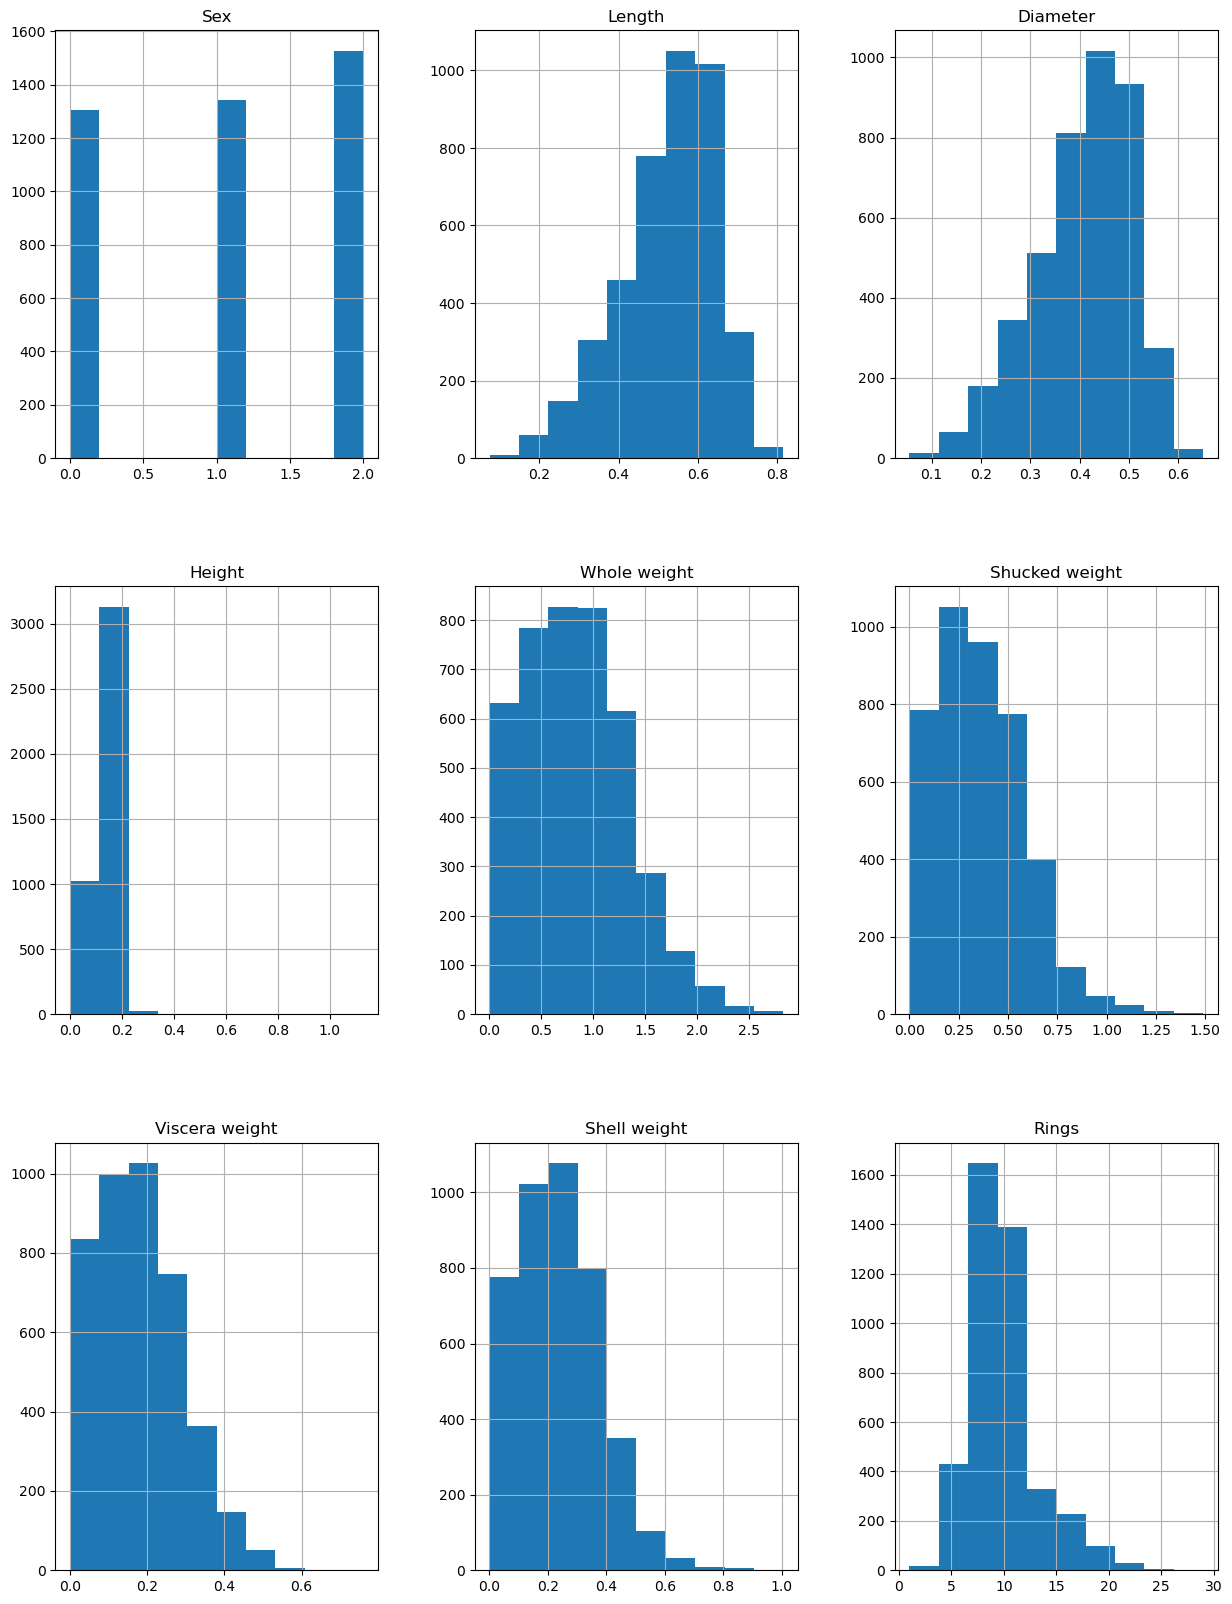

In [16]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [12]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [13]:
#레이블을 숫자로 변환
# LabelEncoder 객체 생성
label = LabelEncoder()

# 문자로 지정된 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['Sex'] = label.fit_transform(df['Sex'])

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [14]:
X=df.drop('Sex', axis=1)

X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [17]:
y=df['Sex']
y.value_counts()

Sex
2    1528
1    1342
0    1307
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값

In [19]:
#모델 학습 효율 높이기 위한 StandardScaler
ss =StandardScaler()
ss.fit(X_train)
ss_train = ss.transform(X_train)
ss_test = ss.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression #선형 분류 모델
from sklearn.svm import SVC #비선형 분류 모델, 데이터셋 많을 시 시간 오래걸림
from sklearn.neural_network import MLPClassifier #다층 퍼셉트론을 구현한 모델, 비선형, 다중 클래스 분
from sklearn.tree import DecisionTreeClassifier #결정트리 기반 분류 알고리즘, 과적합 가능성 높음

from sklearn.metrics import accuracy_score #분류 모델의 정확도 평가, 객관적인 지표 중 하나
from sklearn.metrics import confusion_matrix #모델 성능 평가용 혼동 행렬 생성

In [21]:

clf_svm = SVC(random_state=0) #SVC 모델 생성, random_state=0은 모델 결과의 재현성을 위해 난수 생성기의 시드를 설정
clf_svm.fit(ss_train, y_train) #모델 학습, X학습데이터 Y레이블

pred_svm = clf_svm.predict(ss_test) #test데이터로 예측 수행, 그 결과를 pred_svm에 저장

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm)) #모델의 정확도 계산, (실제레이블, 예측레이블)
print(confusion_matrix(y_test, pred_svm)) #성능평가 TP, FP, TN, FN


--- SVM Classifier ---
0.5617224880382775
[[ 69  46 201]
 [ 12 287  60]
 [ 60  79 231]]


In [22]:

clf_lr = LogisticRegression(random_state=0) #로지스틱 회귀 분석 모델 생성
clf_lr.fit(ss_train, y_train) #모델 훈련

pred_lr = clf_lr.predict(ss_test) #모델 테스트

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))  #실제값인 y_test와 예측값인 pred_lr 확인->정확도
print (confusion_matrix(y_test, pred_lr)) # 얼마나 맞추고 어디서 틀렸는지


--- Logistic Regression Classifier ---
0.569377990430622
[[117  53 146]
 [ 20 291  48]
 [ 98  85 187]]


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

평균제곱근오차 0.6481333799063534


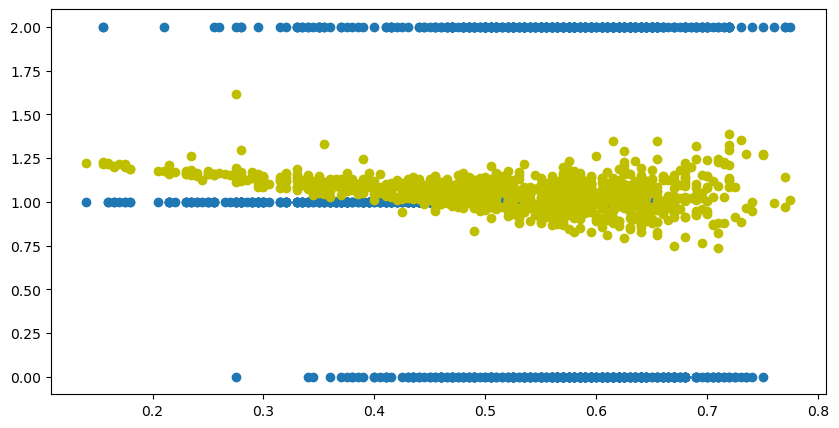

In [28]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='y_test')
plt.scatter(X_test['Length'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()    

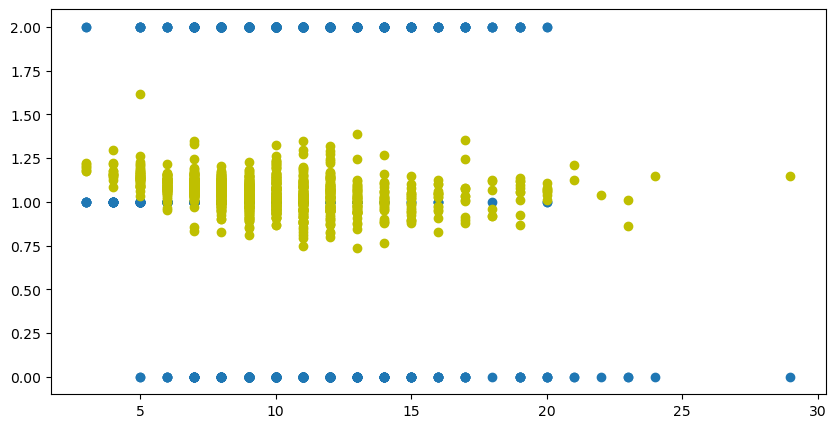

In [29]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['Rings'], y_test, label='y_test')
plt.scatter(X_test['Rings'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()    